### 1. 모델 선정
### 2. 훈련 및 검증 데이터 분할
### 3. 모델 학습 및 하이퍼파라미터 튜닝
### 4. 모델 학습 결과 및 평가 지표

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [45]:
import pandas as pd
import numpy as np
data = pd.read_csv("/content/drive/MyDrive/Adam/신용등급_분류/preprocessing_data.csv")
data.head(5)

,ID,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,23,12,19114.12,1824.843333,3,4,3,...,3,809.98,26.822620,180,1,49.574949,80.415295,3,312.494089,0
1,5635,3392,2,23,12,19114.12,3093.745000,3,4,3,...,1,809.98,31.944960,404,1,49.574949,118.280222,4,284.629162,0
2,5636,3392,3,-500,12,19114.12,3093.745000,3,4,3,...,1,809.98,28.609352,184,1,49.574949,81.699521,5,331.209863,0
3,5637,3392,4,23,12,19114.12,3093.745000,3,4,3,...,1,809.98,31.377862,185,1,49.574949,199.458074,6,223.451310,0
4,5638,3392,5,23,12,19114.12,1824.843333,3,4,3,...,1,809.98,24.797347,186,1,49.574949,41.420153,2,341.489231,0


### 1.모델 선정

### 2. 훈련 및 검증 데이터 분할

In [54]:
from sklearn.model_selection import train_test_split
X = data.iloc[:,:-1]
y = data.iloc[:,-1]
X_train , X_test , y_train , y_test = train_test_split(X,y , test_size= 0.3, random_state=42)
print(f'X_train shape : {X_train.shape}')
print(f'y_train shape : {y_train.shape}')
print(f'X_test shape : {X_test.shape}')
print(f'y_test shape : {y_test.shape}')

X_train shape : (55003, 25)
y_train shape : (55003,)
X_test shape : (23574, 25)
y_test shape : (23574,)


In [47]:
y_train.value_counts()

2    30085
1    15442
0     9476
Name: Credit_Score, dtype: int64

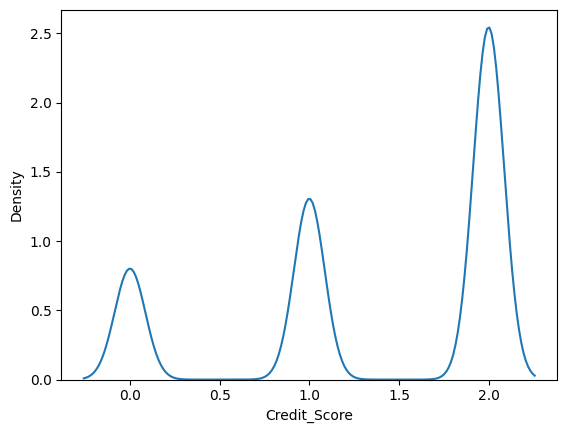

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.kdeplot(y_train)
plt.show()

### 3. 모델 학습

In [58]:
from sklearn.metrics import f1_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
rf_pred = rf.predict(X_test)
print("평균 f1 score : {:.3f}".format(f1_score(y_test,rf_pred,average = "micro")))
print('accuracy score : ',accuracy_score(y_test,rf_pred))

평균 f1 score : 0.801
accuracy score :  0.8014762025960804


In [59]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.linear_model import SGDClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(max_iter=5,random_state=42))
ovo_clf.fit(X_train, y_train)
ove_pred = ovo_clf.predict(X_test)
print('accuracy score : ',accuracy_score(y_test,ove_pred))

accuracy score :  0.28200559938915754


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [55]:
from xgboost import XGBClassifier
xgb_clf = XGBClassifier(n_estimators=300, random_state=156,objective = 'multi:softmax')
xgb_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='auc', eval_set=[(X_train, y_train), (X_test, y_test)])
xgb_pred = xgb_clf.predict(X_test)

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.84760	validation_1-auc:0.84472
[1]	validation_0-auc:0.85072	validation_1-auc:0.84704
[2]	validation_0-auc:0.85343	validation_1-auc:0.84890
[3]	validation_0-auc:0.85853	validation_1-auc:0.85223
[4]	validation_0-auc:0.86123	validation_1-auc:0.85393
[5]	validation_0-auc:0.86302	validation_1-auc:0.85496
[6]	validation_0-auc:0.86454	validation_1-auc:0.85589
[7]	validation_0-auc:0.86629	validation_1-auc:0.85691
[8]	validation_0-auc:0.86804	validation_1-auc:0.85796
[9]	validation_0-auc:0.86974	validation_1-auc:0.85876
[10]	validation_0-auc:0.87135	validation_1-auc:0.85963
[11]	validation_0-auc:0.87315	validation_1-auc:0.86046
[12]	validation_0-auc:0.87481	validation_1-auc:0.86139
[13]	validation_0-auc:0.87634	validation_1-auc:0.86224
[14]	validation_0-auc:0.87776	validation_1-auc:0.86318
[15]	validation_0-auc:0.87954	validation_1-auc:0.86413
[16]	validation_0-auc:0.88067	validation_1-auc:0.86459
[17]	validation_0-auc:0.88181	validation_1-auc:0.86496
[18]	validation_0-au

### 3. 모델 학습 결과 및 평가 지표

In [70]:
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, f1_score,precision_score, recall_score
print(classification_report(y_test, xgb_pred))
print("평균 f1 score : {:.3f}".format(f1_score(y_test,xgb_pred,average = "micro")))
print("평균 precision score : {:.3f}".format(precision_score(y_test,xgb_pred,average = "micro")))
print("평균 recall score : {:.3f}".format(recall_score(y_test,xgb_pred,average = "micro")))
print('accuracy score : {:.3f}'.format(accuracy_score(y_test,xgb_pred)))

              precision    recall  f1-score   support

           0       0.77      0.75      0.76      4036
           1       0.79      0.78      0.78      6558
           2       0.82      0.84      0.83     12980

    accuracy                           0.80     23574
   macro avg       0.79      0.79      0.79     23574
weighted avg       0.80      0.80      0.80     23574

평균 f1 score : 0.804
평균 precision score : 0.804
평균 recall score : 0.804
accuracy score : 0.804


- 결정기준 확인

[Text(0.5, 0.875, 'x[17] <= 1496.785\ngini = 0.592\nsamples = 55003\nvalue = [9476, 15442, 30085]'),
 Text(0.25, 0.625, 'x[16] <= 1.5\ngini = 0.539\nsamples = 38481\nvalue = [9255, 5403, 23823]'),
 Text(0.125, 0.375, 'x[12] <= 15.5\ngini = 0.632\nsamples = 13929\nvalue = [6417, 2760, 4752]'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'x[9] <= 20.5\ngini = 0.372\nsamples = 24552\nvalue = [2838, 2643, 19071]'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'x[14] <= 15.005\ngini = 0.487\nsamples = 16522\nvalue = [221, 10039, 6262]'),
 Text(0.625, 0.375, 'x[9] <= 14.5\ngini = 0.4\nsamples = 8762\nvalue = [45, 6369, 2348]'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'x[17] <= 2573.665\ngini = 0.521\nsamples = 7760\nvalue = [176, 3670, 3914]'),
 Text(0.8125, 0.125, '\n  (...)  \n'),
 Text(0.9375, 0.125, '\n  (...)  \n')]

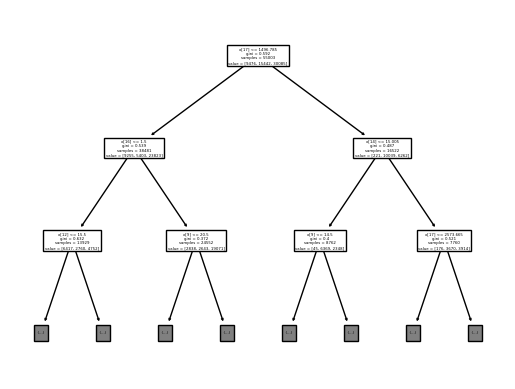

In [75]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
tree.plot_tree(clf,max_depth=2)

- feature importance

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

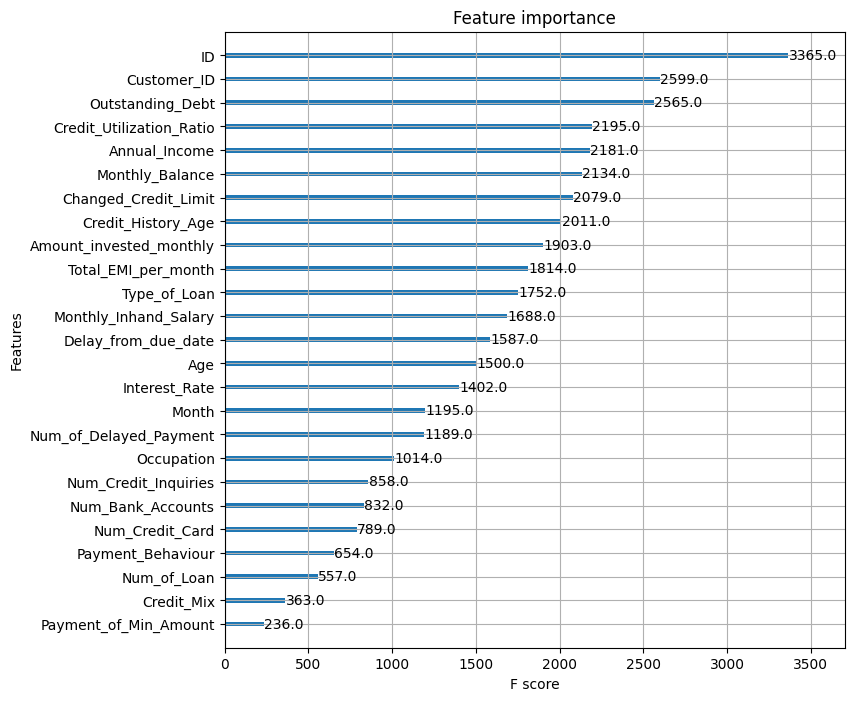

In [78]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(8, 8))
plot_importance(xgb_clf, ax=ax)